In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as ah
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv("CC GENERAL.csv", sep=',')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data.drop('CUST_ID', axis=1, inplace=True)

In [6]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data['CREDIT_LIMIT'].fillna(value= data['CREDIT_LIMIT'].mean(), inplace=True)
data['MINIMUM_PAYMENTS'].fillna(value= data['MINIMUM_PAYMENTS'].mean(), inplace=True)
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
#DATA SCALING
from sklearn.preprocessing import StandardScaler
X = data[["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
#PCA
pca = PCA(n_components=6)
data_pca = pca.fit_transform(X_scaled)
dfn = pd.DataFrame(data_pca ,  columns=['pca1' , 'pca2','pca3','pca4','pca5','pca6'])
dfn

,pca1,pca2,pca3,pca4,pca5,pca6
0,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629
1,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841
2,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222
3,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689
4,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060
...,...,...,...,...,...,...
8945,-0.359629,-2.016145,-0.995355,-2.727433,0.268860,2.673305
8946,-0.564369,-1.639123,-1.290238,-1.860551,0.187104,3.384215
8947,-0.926204,-1.810786,-0.474723,-2.280239,0.386553,2.976948
8948,-2.336552,-0.657966,0.974725,-1.861279,0.069779,3.174380


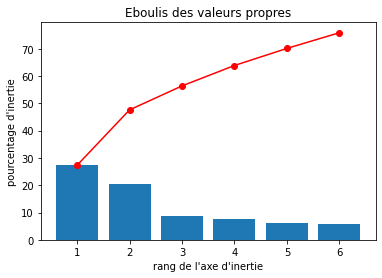

In [12]:
#PCA explained variance criterion
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
display_scree_plot(pca)

In [42]:
new_data = dfn [['pca1','pca2','pca3','pca4']]

In [106]:
#Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=4 , affinity='euclidean' ,linkage='complete')
label = model.fit_predict(new_data)
predicted_df = pd.DataFrame(label)

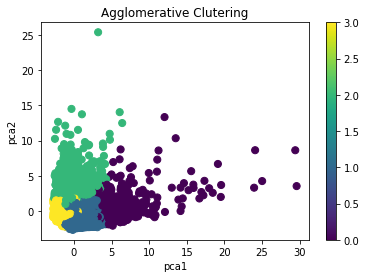

In [121]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (new_data ['pca1'] , new_data ["pca2"] , c= predicted_df[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
plt.colorbar(scatter)
plt.show()

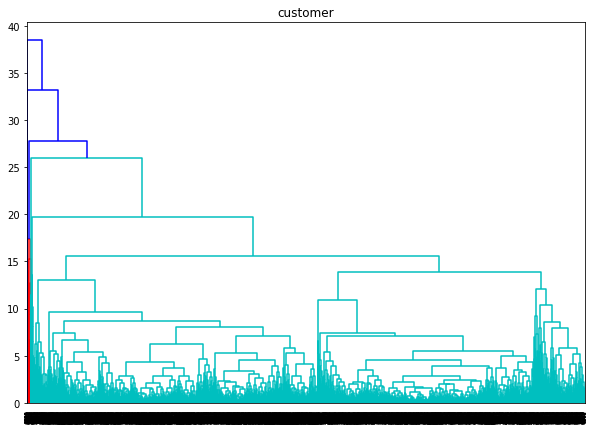

In [124]:
plt.figure( figsize=(10,7))
plt.title('customer')
dend = ah.dendrogram(ah.linkage(new_data , method='complete'))
plt.show()

In [118]:
#K-MEANS CLUSTERING
model_k = KMeans(n_clusters=4)
model_k.fit(new_data)
predicted_df = pd.DataFrame(model_k.labels_)
Clus_Cent_ = model_k.cluster_centers_
data['label'] = predicted_df

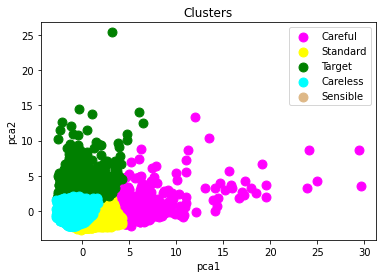

In [119]:
plt.scatter(new_data["pca1"][data.label == 0],          
            new_data["pca2"][data.label == 0],s=80,c='magenta',label='Careful')
plt.scatter(new_data["pca1"][data.label == 1],
           new_data["pca2"][data.label == 1],s=80,c='yellow',label='Standard')
plt.scatter(new_data["pca1"][data.label == 2],
           new_data["pca2"][data.label == 2],s=80,c='green',label='Target')
plt.scatter(new_data["pca1"][data.label == 3], 
           new_data["pca2"][data.label == 3],s=80,c='cyan',label='Careless')
plt.scatter(new_data["pca1"][data.label == 4], 
           new_data["pca2"][data.label == 4],s=80,c='burlywood',label='Sensible')
#plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.show()

In [120]:
model_k.inertia_

45232.31733660445

In [122]:
sum_err = []
for k in range(1,10) :
  km=KMeans(n_clusters=k)
  km.fit(new_data)
  sum_err.append(km.inertia_)

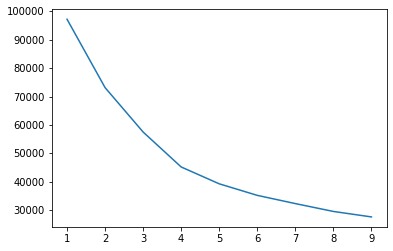

In [123]:
plt.plot(range(1,10),sum_err)
plt.show()

K=4 was indeed the good choice regarding the elbow method.